In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [54]:
df= pd.read_csv("train.csv")

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
X = df[["Age","Fare"]]
y = df["Survived"]

In [57]:
X["Age"].fillna(X["Age"].mean(), inplace =True)


C:\Users\Prakhar Rustagi\AppData\Local\Temp\ipykernel_50124\3882543448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Age"].fillna(X["Age"].mean(), inplace =True)


In [58]:
X.isnull().sum()

Age     0
Fare    0
dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

C:\Users\Prakhar Rustagi\AppData\Local\Temp\ipykernel_50124\1597265146.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


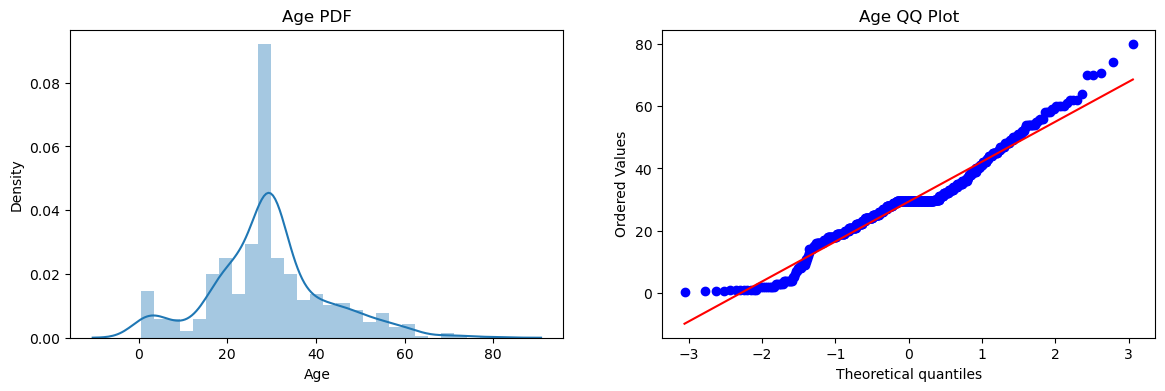

In [60]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()



C:\Users\Prakhar Rustagi\AppData\Local\Temp\ipykernel_50124\1950150168.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["Fare"])


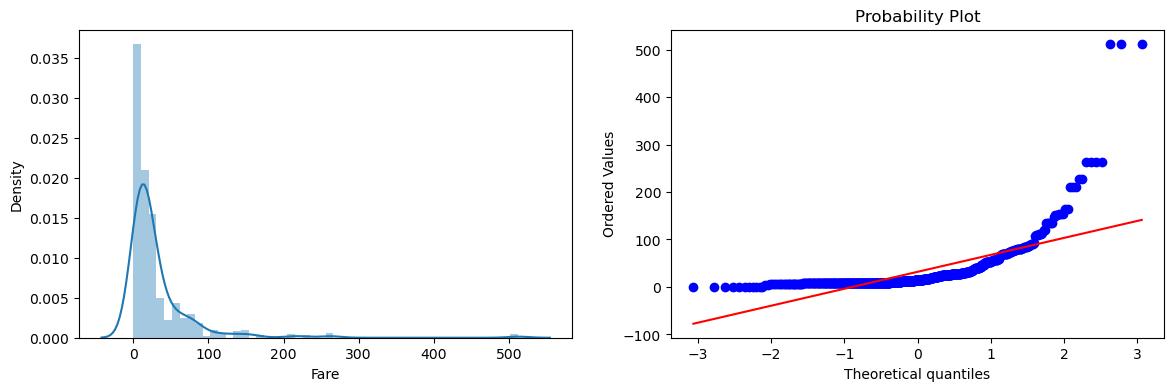

In [61]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(X_train["Fare"])


plt.subplot(122)
stats.probplot(X_train["Fare"], dist= "norm", plot = plt)
plt.show()


## this is clearly right skewed 

In [67]:
## ML model 


model = LogisticRegression()
model_dt = DecisionTreeClassifier()

model.fit(X_train,y_train)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
Prediction_linear = model.predict(X_test)

Prediction_dt = model_dt.predict(X_test)

In [72]:
print(accuracy_score(Prediction_linear,y_test))
print(accuracy_score(Prediction_dt,y_test))

0.6529850746268657
0.6753731343283582


In [73]:
### NOW WE USE FUNCTIONAL TRANSFOMER 


In [84]:
X = df[["Age","Fare"]]
y = df["Survived"]

In [85]:
X["Age"].fillna(X["Age"].mean(), inplace =True)

C:\Users\Prakhar Rustagi\AppData\Local\Temp\ipykernel_50124\596507156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Age"].fillna(X["Age"].mean(), inplace =True)


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [87]:
transformer = FunctionTransformer(func= np.log1p)

In [88]:
X_train_transformed= transformer.fit_transform(X_train)

In [89]:
X_test_transformed= transformer.transform(X_test)

In [91]:
model = LogisticRegression()
model_dt = DecisionTreeClassifier()

model.fit(X_train_transformed,y_train)
model_dt.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [92]:
Prediction_linear = model.predict(X_test)

Prediction_dt = model_dt.predict(X_test)

In [93]:
print(accuracy_score(Prediction_linear,y_test))
print(accuracy_score(Prediction_dt,y_test))

0.7201492537313433
0.582089552238806


In [94]:
## here we can see the logostic performance has improved

In [97]:
## Just to validate 

## LOGISTIC REGRESSION PERFORMANCE AVERAGE

cross_val_score(model, X_train_transformed,y_train, cv=10, scoring="accuracy").mean()

0.6802355350742448

In [99]:
## Just to validate 

##DECSISON TREE  PERFORMANCE AVERAGE

cross_val_score(model_dt, X_train_transformed,y_train, cv=10, scoring="accuracy").mean()

0.6020993343573989